In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from nninst.utils.fs import abspath
from nninst.backend.tensorflow.model import AlexNet
from nninst.op import Conv2dOp, DenseOp

In [2]:
threshold = 0.5

In [7]:
path_template = "alexnet_imagenet_real_metrics_per_layer_{0:.1f}_{1}_{2}.csv"
attack_name="normal"
label_name="import_rank1"
path="metrics/" + path_template.format(
                        threshold,
                        attack_name,
                        label_name,
                    )
df = pd.read_csv(abspath(path))
df.info()

In [10]:
layers = AlexNet.graph().load().ops_in_layers(Conv2dOp, DenseOp)
for layer in layers:
    df[f"{layer}.similarity"] = df[f"{layer}.overlap_size_in_class"] / df[f"{layer}.overlap_size_total"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 34 columns):
Unnamed: 0                                       533 non-null int64
class_id                                         533 non-null int64
conv2d/Conv2D.overlap_size_in_class              533 non-null int64
conv2d/Conv2D.overlap_size_total                 533 non-null int64
conv2d_1/Conv2D.overlap_size_in_class            533 non-null int64
conv2d_1/Conv2D.overlap_size_total               533 non-null int64
conv2d_2/Conv2D.overlap_size_in_class            533 non-null int64
conv2d_2/Conv2D.overlap_size_total               533 non-null int64
conv2d_3/Conv2D.overlap_size_in_class            533 non-null int64
conv2d_3/Conv2D.overlap_size_total               533 non-null int64
conv2d_4/Conv2D.overlap_size_in_class            533 non-null int64
conv2d_4/Conv2D.overlap_size_total               533 non-null int64
dense/MatMul.overlap_size_in_class               533 non-null int64
dense/MatMu

In [18]:
similarity_col = np.concatenate([df[f"{layer}.similarity"] 
                                 for layer in layers])
layer_col = np.concatenate([[layer[:layer.index("/")]] * len(df[f"{layer}.similarity"])
                            for layer in layers])
plot_df = pd.DataFrame({"Similarity": similarity_col, "Layer": layer_col})
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 2 columns):
Similarity    4264 non-null float64
Layer         4264 non-null object
dtypes: float64(1), object(1)
memory usage: 66.7+ KB


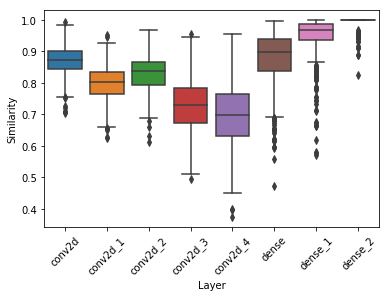

In [20]:
ax = sns.boxplot(x="Layer", y="Similarity", data=plot_df)
ax.tick_params(axis="x", labelrotation=45)



In [26]:
summary_df = plot_df.groupby("Layer").mean().reset_index()
summary_df.to_csv("layerwise_similarity_alexnet_imagenet.csv", index=False)
